In [3]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

- count len of sentences, words, text, paragraphs

In [28]:
with open("../data/raf.txt", 'r') as text:
    textfile = text.read()
    print(textfile)

Twice in the 1920s, the small city of Muncie, Indiana, population 38,000, found itself thrust
under the spotlight of national prominence. In 1929, the sociologists Robert and Helen Lynd
published Middletown: A Study in Contemporary American Culture, a groundbreaking work that
purported to analyze and quantify the life of an average American city. Middletown portrayed
Muncie as a representative microcosm of the United States, and diagnosed the ills of the
industrial age-- corrupt politics, hollowed out religious life, a bought-and-paid-for press as the
consequences of voracious capitalism.1 Middletown became a surprise best-seller, garnering
praise from academics, public intellectuals, and lay readers alike, and reshaping the field of
sociology for years to come. Indeed, a generation of sociologists and advertisers bought into the
myth of Muncie's typicality, and considered Middletown a window into the heart of normal
American life. Three years prior, Muncie appeared in newspapers aroun

In [5]:
type(rafi)

str

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_review = tokenizer.tokenize(rafi)

In [7]:
fdist = FreqDist(tokenized_review)
print(fdist)

<FreqDist with 3196 samples and 11715 outcomes>


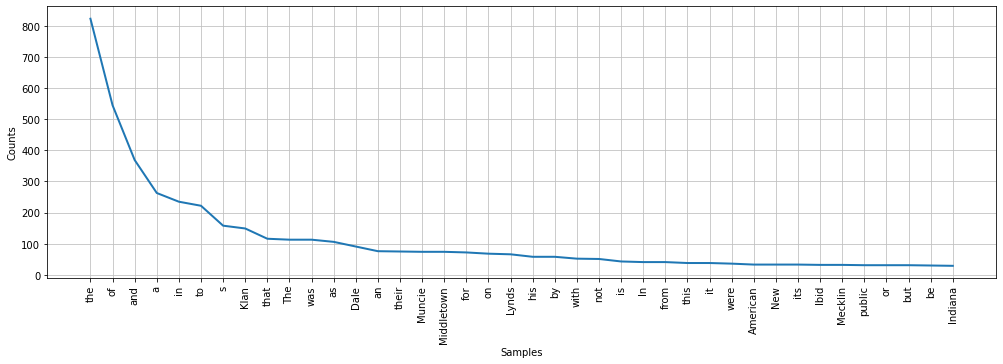

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
plt.figure(figsize=(17,5))
fdist.plot(40)

In [10]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'few', 's', 'don', 'once', 'only', "mustn't", 'wasn', 'what', 'here', 'your', 'll', "she's", 'below', 'needn', "shouldn't", "hasn't", 'can', 'their', 'ain', 'have', 'being', 'itself', 'had', 'by', 'me', 'a', 'under', 'hers', 'about', "don't", 'do', 'himself', "needn't", 'o', 'than', "hadn't", 'am', 'wouldn', 'our', "isn't", 'then', 'herself', 'to', 'when', 'themselves', "didn't", 'them', 'shan', 'where', 'y', 'myself', 'does', 'her', "wasn't", 'is', 'other', 'some', 'on', 'and', 'any', 'shouldn', 'which', 'further', 'but', "you're", 'm', 'ours', 'off', 'before', 'was', 'in', "doesn't", 'doing', 'up', 'against', 'just', 'how', 'into', "couldn't", 'hasn', 'yourself', 'those', 'the', 'won', 'too', 'd', 'hadn', 'has', 'very', 'for', 'will', 'own', 'my', 'i', 'having', 'its', "mightn't", 'mustn', 'between', 'at', 'from', 'again', "you'd", 'or', 'did', 'doesn', 'over', 'both', 'why', 'she', 'out', 'after', 'such', 'it', 'while', 'him', 'whom', 'ma', 'now', 'most', "that'll", "it's", "won't"

In [12]:
filtered_review=[]
for w in tokenized_review:
    if w not in stop_words:
        filtered_review.append(w)
# print("Filterd Sentence:",filtered_review)

In [13]:
print(len(tokenized_review))
print(len(filtered_review))

11715
7315


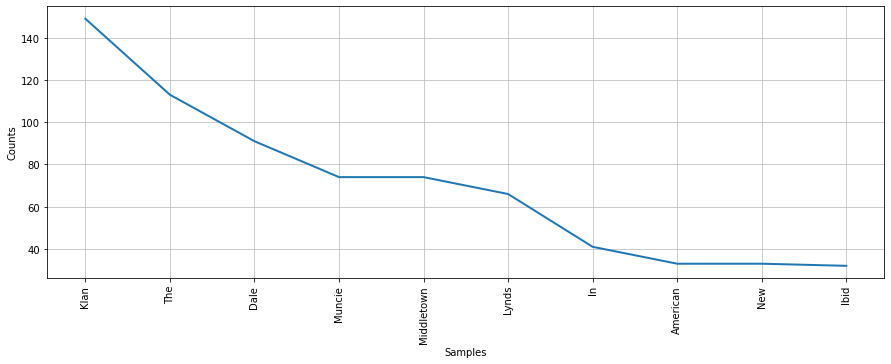

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
fdist = FreqDist(filtered_review)
plt.figure(figsize=(15,5))
fdist.plot(10)